In [50]:
# Importing all necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
# Loading dataset

df = pd.read_csv("/content/drive/MyDrive/NPHA-doctor-visits.csv")

In [52]:
df.head()

,Number of Doctors Visited,Age,Phyiscal Health,Mental Health,Dental Health,Employment,Stress Keeps Patient from Sleeping,Medication Keeps Patient from Sleeping,Pain Keeps Patient from Sleeping,Bathroom Needs Keeps Patient from Sleeping,Uknown Keeps Patient from Sleeping,Trouble Sleeping,Prescription Sleep Medication,Race,Gender
0,3,2,4,3,3,3,0,0,0,0,1,2,3,1,2
1,2,2,4,2,3,3,1,0,0,1,0,3,3,1,1
2,3,2,3,2,3,3,0,0,0,0,1,3,3,4,1
3,1,2,3,2,3,3,0,0,0,1,0,3,3,4,2
4,3,2,3,3,3,3,1,0,0,0,0,2,3,1,2


# Data Preparation

In [53]:
df = df.rename(columns={'Phyiscal Health': 'Physical Health'}) # Renaming columns
df.apply(np.unique) # Checking unique values in each column

Number of Doctors Visited                                  [1, 2, 3]
Age                                                              [2]
Physical Health                                  [-1, 1, 2, 3, 4, 5]
Mental Health                                    [-1, 1, 2, 3, 4, 5]
Dental Health                                 [-1, 1, 2, 3, 4, 5, 6]
Employment                                              [1, 2, 3, 4]
Stress Keeps Patient from Sleeping                            [0, 1]
Medication Keeps Patient from Sleeping                        [0, 1]
Pain Keeps Patient from Sleeping                              [0, 1]
Bathroom Needs Keeps Patient from Sleeping                    [0, 1]
Uknown Keeps Patient from Sleeping                            [0, 1]
Trouble Sleeping                                       [-1, 1, 2, 3]
Prescription Sleep Medication                          [-1, 1, 2, 3]
Race                                                 [1, 2, 3, 4, 5]
Gender                            

Here are the observations:

1) Age only has one value, therefore it does not contribute, we'll drop the column.

2) values that are equal to "-1" mean the patient refused to give information. We need to assess the number of instances that has happened to proceed.


In [54]:
df = df.drop(['Age'], axis=1) # Dropping 'Age' column

df_filtered = df.copy() # Making a copy for filtered dataset

# List of columns to filter
columns = ['Physical Health',
           'Mental Health',
           'Dental Health',
           'Trouble Sleeping',
           'Prescription Sleep Medication']

# Iterate through the columns and filter
for column in columns:
    df_filtered = df_filtered[df_filtered[column] != -1]

In [55]:
print(f'Unclean dataset shape: {df.shape}')
print(f'Cleaned dataset shape: {df_filtered.shape}')

Unclean dataset shape: (714, 14)
Cleaned dataset shape: (696, 14)


Since there are only 18 instances where "-1" is present, let us try using logistic regression on both the filtered (without "-1") and unfiltered (with "-1") dataframes. If the performance of the filetered dataframe is significantly better, we can move forward with it else we can just use the unfiltered dataframe.  

In [56]:
# Separating target and features in both filtered and unfiltered dataframe

X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

X_filtered = df_filtered.iloc[:, 1:].values
y_filtered = df_filtered.iloc[:, 0].values

In [57]:
print(X)

[[4 3 3 ... 3 1 2]
 [4 2 3 ... 3 1 1]
 [3 2 3 ... 3 4 1]
 ...
 [4 2 3 ... 3 1 1]
 [3 1 3 ... 3 1 2]
 [3 2 2 ... 3 1 1]]


In [58]:
print(y)

[3 2 3 1 3 2 3 2 2 1 2 2 1 2 3 3 2 3 2 2 3 3 1 2 3 3 2 2 2 3 1 1 1 3 2 3 2
 2 1 3 2 2 2 3 2 1 2 2 3 2 2 2 2 3 2 2 2 2 3 3 3 2 1 2 3 1 2 2 1 2 3 2 2 3
 1 3 1 2 2 2 3 2 2 2 2 2 2 1 1 2 2 2 3 1 2 1 2 1 2 2 2 3 1 2 2 2 2 2 2 3 3
 1 3 3 1 1 1 1 3 2 2 1 2 2 2 1 2 3 3 3 2 1 3 2 2 3 2 2 2 3 3 3 2 2 3 2 2 2
 1 2 2 3 2 2 2 3 2 1 2 3 1 2 2 2 2 2 2 3 2 2 1 2 1 2 3 2 2 2 2 3 2 3 1 2 2
 1 1 3 3 2 1 2 2 1 2 2 2 2 2 2 2 3 2 3 3 1 3 2 2 1 2 2 3 2 3 3 3 2 2 2 2 3
 3 3 3 2 1 1 1 2 1 2 2 1 2 2 2 2 2 2 2 3 2 2 2 3 3 2 1 3 3 1 3 3 3 3 3 2 1
 2 3 2 2 3 3 2 2 2 1 3 1 1 2 1 2 3 2 1 2 2 3 2 2 3 2 1 2 2 3 3 2 2 2 2 2 2
 3 2 2 1 3 2 2 3 1 2 3 1 2 2 2 1 1 1 3 3 1 3 1 2 2 3 2 3 1 2 2 1 3 1 2 1 2
 3 3 3 3 2 3 3 3 2 3 2 1 2 2 3 2 2 3 1 1 3 1 2 3 2 2 2 3 1 2 3 3 3 3 2 3 2
 2 2 2 3 2 2 2 1 2 2 2 2 2 2 2 2 2 1 3 2 3 3 2 2 3 1 3 1 1 2 3 3 2 3 2 2 1
 1 2 2 1 3 3 3 2 1 3 2 2 3 2 3 1 2 2 1 2 2 3 2 3 2 2 2 3 1 3 3 2 1 2 3 2 3
 2 2 1 3 2 2 1 2 2 2 3 1 2 2 2 1 2 2 3 2 2 3 3 1 2 2 2 2 2 1 2 2 3 3 2 2 1
 2 2 2 1 2 2 1 3 2 2 2 3 

In [59]:
# Train-test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)
X_train_filtered, X_test_filtered, y_train_filtered, y_test_filtered = train_test_split(X_filtered, y_filtered, test_size=0.25, stratify = y_filtered, random_state=42)

In [60]:
print(f"Number of samples and attributes: {X_train.shape}")
print(f"Number of samples and attributes in filtered dataframe: {X_train_filtered.shape}")

Number of samples and attributes: (535, 13)
Number of samples and attributes in filtered dataframe: (522, 13)


# Data Visualisation

This is a bit better for visualization but lets try PCA to visualize it much better.

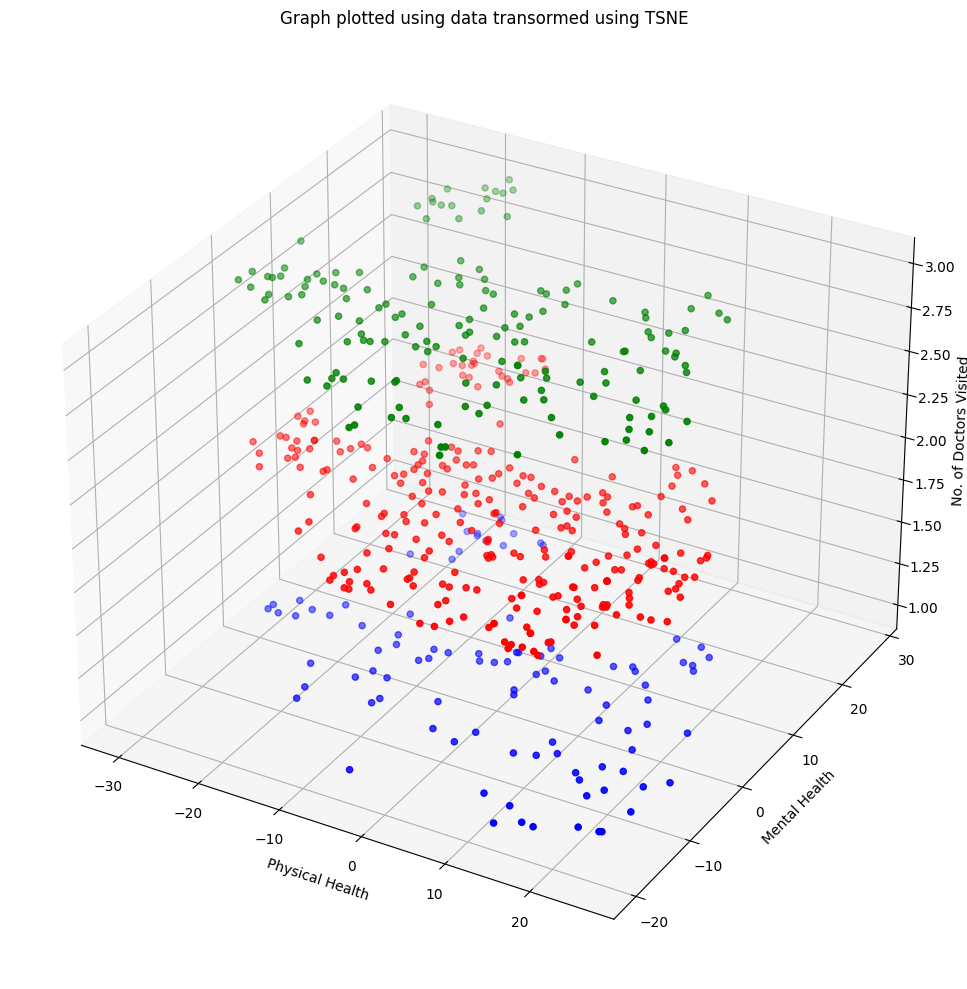

In [61]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2)
tsne.fit(X_train)

X_train_tsne = tsne.fit_transform(X_train)

fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(projection='3d')

ax.scatter(X_train_tsne[y_train==1, 0], X_train_tsne[y_train==1, 1], y_train[y_train==1], color="b");
ax.scatter(X_train_tsne[y_train==2, 0], X_train_tsne[y_train==2, 1], y_train[y_train==2], color="r");
ax.scatter(X_train_tsne[y_train==3, 0], X_train_tsne[y_train==3, 1], y_train[y_train==3], color="g");

ax.set_title("Graph plotted using data transormed using TSNE")
ax.set_xlabel("Physical Health")
ax.set_ylabel("Mental Health")
ax.set_zlabel("No. of Doctors Visited")

plt.tight_layout()
plt.show()



# Training Models


**Logistic Regression**

In [62]:
from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression(multi_class='multinomial')

In [63]:
softmax = logmodel.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [64]:
softmax_filt = logmodel.fit(X_train_filtered, y_train_filtered)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [65]:
softmax_score = softmax.score(X_test, y_test)
print(f'Classification accuracy using unfiltered data is {softmax_score}')
softmax_score_filtered = softmax_filt.score(X_test_filtered, y_test_filtered)
print(f'Classification accuracy using filtered data is {softmax_score_filtered}')

Classification accuracy using unfiltered data is 0.5698324022346368
Classification accuracy using filtered data is 0.5229885057471264


As we can see, the filtered data score is suprisingly lower than the unfiltered data score. This could be because the rows we removed could have had other features that still added significance despite the "-1s". Hence we will go forward with the unfiltered dataset for the remaining algorithms.

**Support Vector Machine**

In [66]:
from sklearn import svm

linearSVM = svm.SVC(kernel='linear')
linearSVM.fit(X_train, y_train)

SVC(kernel='linear')

In [67]:
linearSVM_score = linearSVM.score(X_test, y_test)
print(f'Classification accuracy using Linear SVM is {linearSVM_score}')

Classification accuracy using Linear SVM is 0.5195530726256983


In [68]:
# Scaling features for better performance of polynomial and rbf kernels
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [88]:
kernelSVM = svm.SVC(kernel='rbf')
rbf = kernelSVM.fit(X_train_scaled, y_train)

In [90]:
kernelSVM_score = kernelSVM.score(X_test_scaled, y_test)
print(f'Classification accuracy using rbf kernel is {kernelSVM_score}')

Classification accuracy using rbf kernel is 0.5195530726256983


In [71]:
polynomialSVM = svm.SVC(kernel='poly')
polynomialSVM.fit(X_train_scaled, y_train)

SVC(kernel='poly')

In [72]:
polynomialSVM_score = polynomialSVM.score(X_test_scaled, y_test)
print(f'Classification accuracy using polynomial SVM is {polynomialSVM_score}')

Classification accuracy using polynomial SVM is 0.5083798882681564


**Decision Tree Classifier**

In [73]:
from sklearn.tree import DecisionTreeClassifier

decisionTree = DecisionTreeClassifier()
decisionTree.fit(X_train, y_train)

DecisionTreeClassifier()

In [74]:
decisionTree_score = decisionTree.score(X_test, y_test)
print(f'Classification accuracy using decision tree classifier is {decisionTree_score}')

Classification accuracy using decision tree classifier is 0.37988826815642457


**Random Forest Classifier**

In [75]:
from sklearn.ensemble import RandomForestClassifier

randomForest = RandomForestClassifier()
randomForest.fit(X_train, y_train)


RandomForestClassifier()

In [76]:
rf_score = randomForest.score(X_test, y_test)
print(f'Classification accuracy using random forest classifier is {rf_score}')

Classification accuracy using random forest classifier is 0.48044692737430167


**AdaBoost Classifier**

In [77]:
from sklearn.ensemble import AdaBoostClassifier

adaBoost = AdaBoostClassifier()
adaBoost.fit(X_train, y_train)

AdaBoostClassifier()

In [78]:
adaBoost_score = adaBoost.score(X_test, y_test)
print(f'Classification accuracy using adaptive boosting is {adaBoost_score}')

Classification accuracy using adaptive boosting is 0.5083798882681564


**Gradient Boost Classifier**

In [79]:
from sklearn.ensemble import GradientBoostingClassifier

gradientBoosting = GradientBoostingClassifier()
gradientBoosting.fit(X_train, y_train)

GradientBoostingClassifier()

In [80]:
GB_score = gradientBoosting.score(X_test, y_test)
print(f'Classification accuracy using gradient boosting is {GB_score}')

Classification accuracy using gradient boosting is 0.5363128491620112


#  Comparing Model Performance and Final Insights

In [81]:
from sklearn.metrics import classification_report, confusion_matrix

# Function to plot confusion matrix

def plot_confusion_matrix(ax, y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_title(f'Confusion Matrix - {model_name}')
    ax.set_ylabel('Actual')
    ax.set_xlabel('Predicted')

models = {
    'Logistic Regression': logmodel,
    'Linear SVM': linearSVM,
    'RBF SVM': kernelSVM,
    'Polynomial SVM': polynomialSVM,
    'Decision Tree': decisionTree,
    'Random Forest': randomForest,
    'AdaBoost': adaBoost,
    'Gradient Boosting': gradientBoosting
}

def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    return y_pred, classification_report(y_test, y_pred, output_dict=True)

n_models = len(models)
n_cols = 2
n_rows = (n_models + n_cols - 1) // n_cols


Evaluating Logistic Regression:

Evaluating Linear SVM:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Evaluating RBF SVM:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Evaluating Polynomial SVM:

Evaluating Decision Tree:

Evaluating Random Forest:

Evaluating AdaBoost:

Evaluating Gradient Boosting:


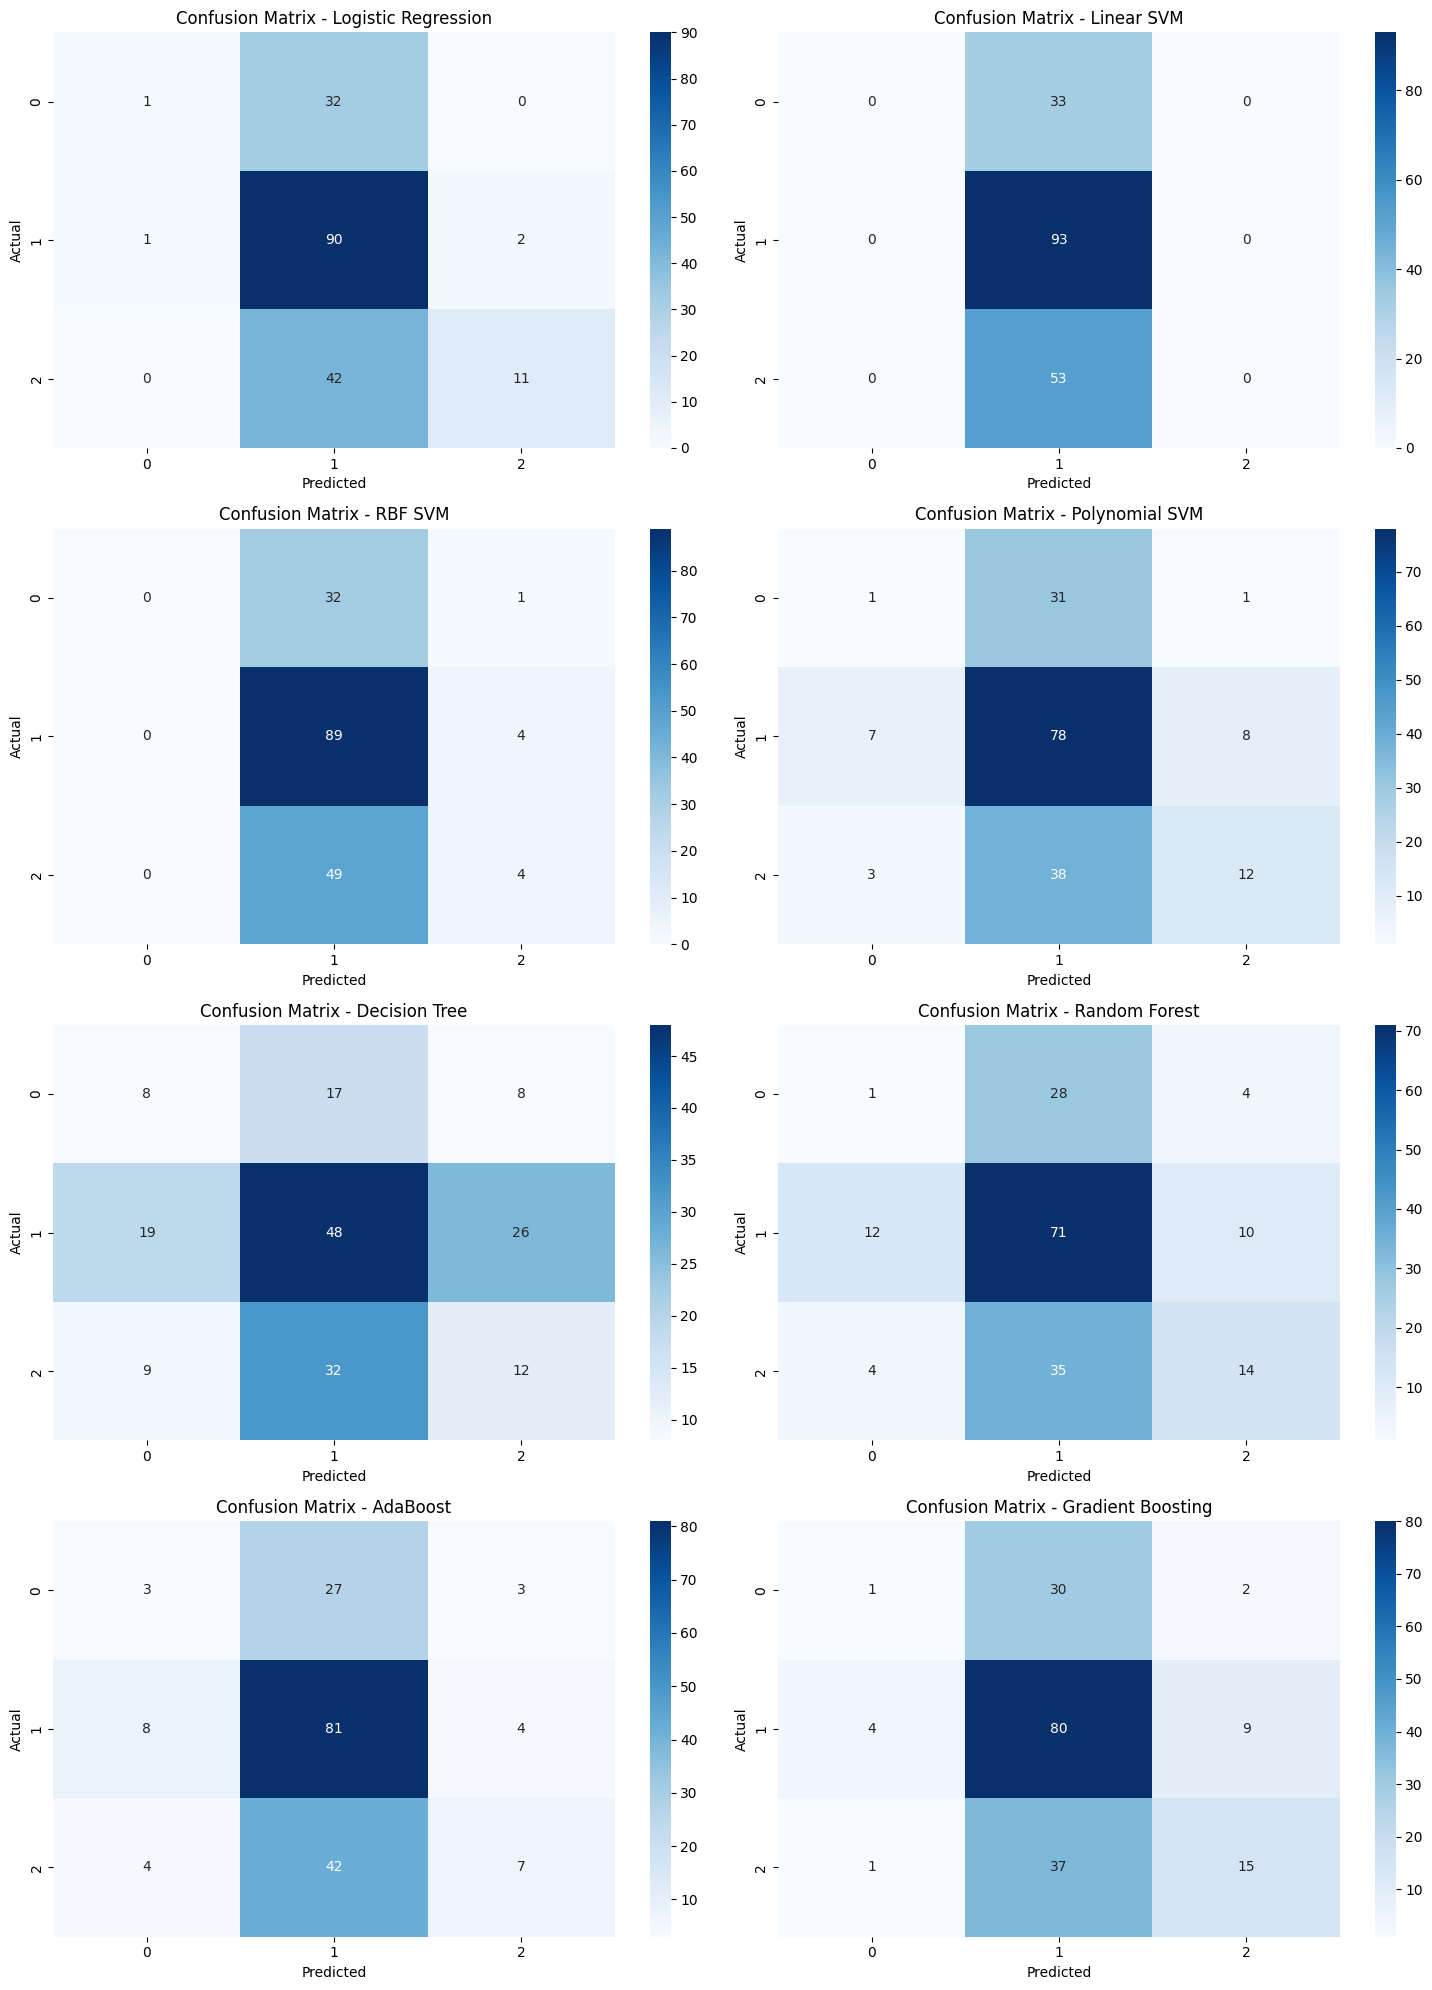

In [82]:
# Create a large figure for all confusion matrices
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
axes = axes.flatten()

results = {}

for i, (name, model) in enumerate(models.items()):
    print(f"\nEvaluating {name}:")
    if name in ['RBF SVM', 'Polynomial SVM']:
        y_pred, results[name] = evaluate_model(model, X_test_scaled, y_test, name)
    else:
        y_pred, results[name] = evaluate_model(model, X_test, y_test, name)

    plot_confusion_matrix(axes[i], y_test, y_pred, name)

# Remove any unused subplots
for i in range(n_models, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

In [83]:
# Creating metrics table (class-wise)

def create_metrics_table(results):
    metrics = []
    for model_name, result in results.items():
        for class_label in ['1', '2', '3']:
            metrics.append({
                'Model': model_name,
                'Class': class_label,
                'Precision': result[class_label]['precision'],
                'Recall': result[class_label]['recall'],
                'F1-score': result[class_label]['f1-score']
            })
    return pd.DataFrame(metrics)

metrics_table = create_metrics_table(results)
print(metrics_table)

                  Model Class  Precision    Recall  F1-score
0   Logistic Regression     1   0.500000  0.030303  0.057143
1   Logistic Regression     2   0.548780  0.967742  0.700389
2   Logistic Regression     3   0.846154  0.207547  0.333333
3            Linear SVM     1   0.000000  0.000000  0.000000
4            Linear SVM     2   0.519553  1.000000  0.683824
5            Linear SVM     3   0.000000  0.000000  0.000000
6               RBF SVM     1   0.000000  0.000000  0.000000
7               RBF SVM     2   0.523529  0.956989  0.676806
8               RBF SVM     3   0.444444  0.075472  0.129032
9        Polynomial SVM     1   0.090909  0.030303  0.045455
10       Polynomial SVM     2   0.530612  0.838710  0.650000
11       Polynomial SVM     3   0.571429  0.226415  0.324324
12        Decision Tree     1   0.222222  0.242424  0.231884
13        Decision Tree     2   0.494845  0.516129  0.505263
14        Decision Tree     3   0.260870  0.226415  0.242424
15        Random Forest 

In [86]:
# Tabulating model scores
model_scores = {
    'Logistic Regression': softmax_score,
    'Linear SVM': linearSVM_score,
    'RBF SVM': kernelSVM_score,
    'Polynomial SVM': polynomialSVM_score,
    'Decision Tree': decisionTree_score,
    'Random Forest': rf_score,
    'AdaBoost': adaBoost_score,
    'Gradient Boosting': GB_score
}

# Create a DataFrame from the scores
df_scores = pd.DataFrame(list(model_scores.items()), columns=['Model', 'Model score'])

df_scores

,Model,Model score
0,Logistic Regression,0.569832
1,Linear SVM,0.519553
2,RBF SVM,0.519553
3,Polynomial SVM,0.508380
4,Decision Tree,0.379888
5,Random Forest,0.480447
6,AdaBoost,0.508380
7,Gradient Boosting,0.536313


<ipython-input-87-061ac74c1f7b>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model score', y='Model', data=df_scores_sorted, palette='mako')


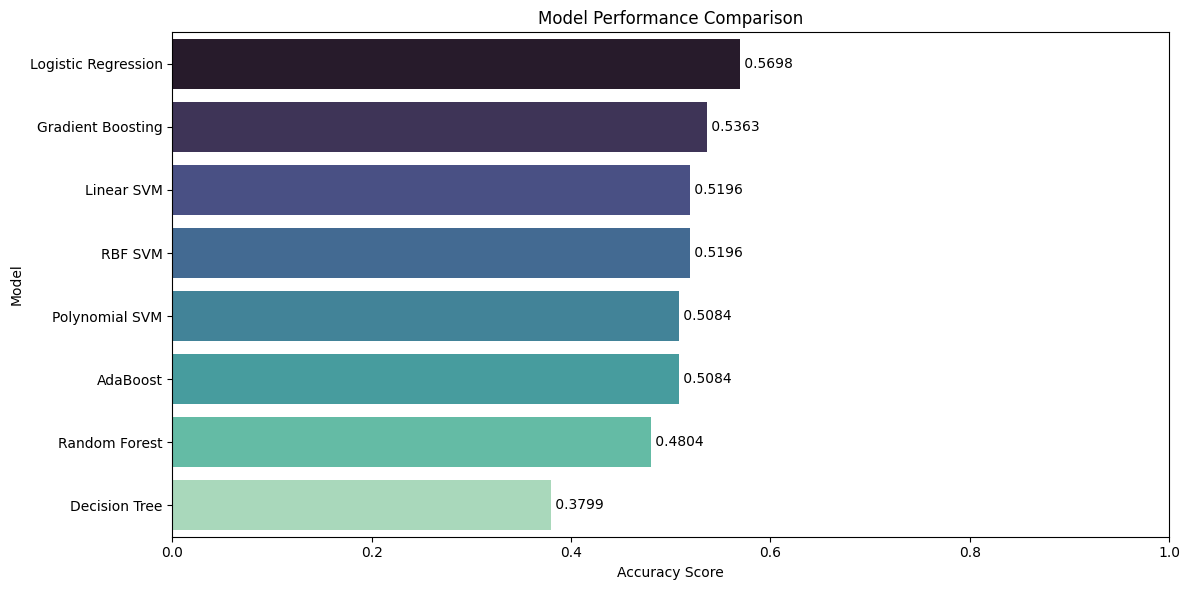

In [87]:
# Create a bar plot for model scores
df_scores_sorted = df_scores.sort_values('Model score', ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x='Model score', y='Model', data=df_scores_sorted, palette='mako')
plt.title('Model Performance Comparison')
plt.xlabel('Accuracy Score')
plt.ylabel('Model')
plt.xlim(0, 1)

# Add value labels to the end of each bar
for i, v in enumerate(df_scores_sorted['Model score']):
    plt.text(v, i, f' {v:.4f}', va='center')

plt.tight_layout()
plt.show()

## Final insights

As we can infer, all models performed rather poorly with no hyperparameter tuning. The scores range from 0.36-0.53, this is just above the score if we randomly predict classes which will be 0.33 for a three-class dataset.

Despite trying alternate approaches, the models did not perform better, some of which aren't illustrated here in favour of making this project concise and not too long. For example: Destratification of samples,
checking performance of models (other than logistic regression) with 'X_train_filtered' and 'X_test_filtered',
using a different value for 'random_state' parameter,
using noise-induced data for predictions,
using a different solver for logistic regression,
and more.